# Learning from experts

In [1]:
%load_ext autoreload
%autoreload 2

## Question 11
Plot average reward and average training loss for every 250 games during training. Does
the loss decrease? Does the agent learn to play Tic Tac Toe?

In [4]:
import matplotlib.pyplot as plt

def plot_average_stats(players, log_every=250):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title(f'Average loss per {log_every} games')
    axes[0].set_xlabel('Game')
    axes[0].set_ylabel('Loss')
    for player in players:
        label = None if callable(player.epsilon) else f"eps={player.epsilon}"
        axes[0].plot(list(range(len(player.avg_losses))), player.avg_losses, label=label)
    axes[0].legend()

    axes[1].set_title(f'Average reward per {log_every} games')
    axes[1].set_xlabel('Game')
    axes[1].set_ylabel('Reward')
    for player in players:
        label = None if callable(player.epsilon) else f"eps={player.epsilon}"
        axes[1].plot(list(range(len(player.avg_rewards))), player.avg_rewards, label=label)
    axes[1].legend()

    plt.legend()
    plt.show()

### Fixed epsilon

In [ ]:
from utils import play
from deepqlearner import DeepQPlayer
from tic_env import OptimalPlayer

suboptimal_player = OptimalPlayer(epsilon=0.5)
q_player_001 = DeepQPlayer(epsilon=0.01, target_update=500, batch_size=64, log_every=250)

play(suboptimal_player, q_player_001, episodes=20000)

In [ ]:
from utils import play
from deepqlearner import DeepQPlayer
from tic_env import OptimalPlayer

suboptimal_player = OptimalPlayer(epsilon=0.5)
q_player_01 = DeepQPlayer(epsilon=0.1, target_update=500, batch_size=64, log_every=250)

play(suboptimal_player, q_player_01, episodes=20000)

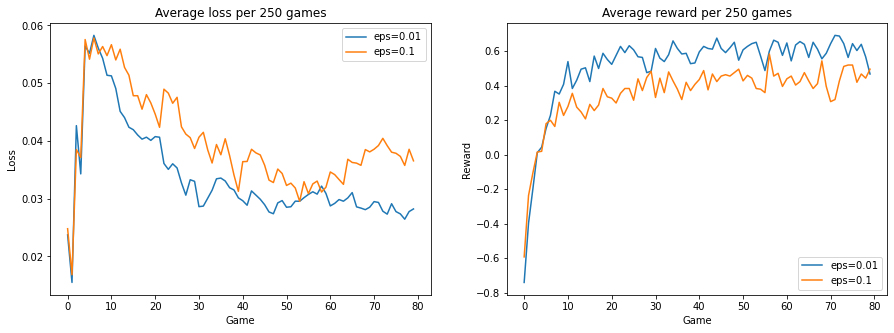

In [14]:
plot_average_stats([q_player_001, q_player_01])

### Arbitrary epsilon

In [2]:
from utils import play
from deepqlearner import DeepQPlayer
from tic_env import OptimalPlayer
import random

suboptimal_player = OptimalPlayer(epsilon=0.5)
q_player = DeepQPlayer(epsilon=lambda: random.random(), target_update=500, batch_size=64, log_every=250)

play(suboptimal_player, q_player, episodes=20000)

({'wins': 9017, 'losses': 7252, 'M': 0.08825},
 {'wins': 7252, 'losses': 9017, 'M': -0.08825})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


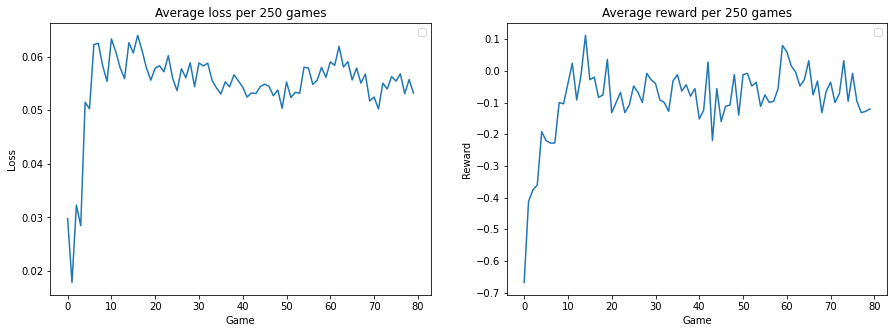

In [5]:
plot_average_stats([q_player])